# DSCI 235 Final Project
William Mayes 
Spring 2023

With the following data(acquired from kaggle) I will be examining and analyzing the most profitable industries and S&P 500 companies under various political and economic climates from 2013 - 2018. These datasets were the only free, quality datasets. So range of dates is limited, but this could be applied to other dates. If data covering other years was available you could read it in and merge it with the dataset I will create below. The questions I'm attempting to answer are if US political intervention effects who is successful as well as who profits under which US political  conditions. Also, I'll be looking at which indutries are most profitable during a shift in US and global economic conditions.

* Import pandas, numpy, and matplotlib for use throughout the document. Read in the CSV files and create three dataframes using pandas ".read_csv()" function. I will print the first 5 rows of each, to see the type of data I'm working with, the column names, and determine how I would like to merge them.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the CSV files into dataframes
allStocks = pd.read_csv('C:/Users/willm/OneDrive/Documents/Excel/all_stocks_5yr.csv', encoding = 'ISO-8859-1')
sp500Companies = pd.read_csv('C:/Users/willm/OneDrive/Documents/Excel/sp500-companies.csv', encoding = 'ISO-8859-1')
sixYrStockData = pd.read_csv('C:/Users/willm/OneDrive/Documents/Excel/dataset_summary.csv', encoding = 'ISO-8859-1')
print(allStocks.head())
print(sp500Companies.head())
print(sixYrStockData.head())

        date   open   high    low  close    volume Symbol
0   2/8/2013  15.07  15.12  14.63  14.75   8407500    AAL
1  2/11/2013  14.89  15.01  14.26  14.46   8882000    AAL
2  2/12/2013  14.45  14.51  14.10  14.27   8126000    AAL
3  2/13/2013  14.30  14.94  14.25  14.66  10259500    AAL
4  2/14/2013  14.94  14.96  13.16  13.99  31879900    AAL
  Symbol         Name                Industry                    Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                 Pharmaceuticals   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      Founded  
0    Saint Paul, Minnesota    3/4/1957         1902  
1     Milwaukee, Wisconsin   7/26/2017         1916  
2  

* Each dataset has "Symbol" column in common, as well as this being the most logical way to do this, merge the dataframes into one dataset by stock symbol. I've merged these three datasets to make sure I cover the years 2013 - 2018. Then I print out the first 5 rows to see what I'm working with so I know how I'd like to clean the data.

In [4]:
stockData = pd.merge(allStocks, sp500Companies, on = 'Symbol')
stockData = pd.merge(stockData, sixYrStockData, on = 'Symbol')
stockData.head()

,date,open,high,low,close,volume,Symbol,Name,Industry,Sub-Industry,Headquarters Location,Date added,Founded,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",3/23/2015,1934,3954,9/27/2005,6/11/2021,30,1/28/2014,4/22/2021
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",3/23/2015,1934,3954,9/27/2005,6/11/2021,30,1/28/2014,4/22/2021
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",3/23/2015,1934,3954,9/27/2005,6/11/2021,30,1/28/2014,4/22/2021
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",3/23/2015,1934,3954,9/27/2005,6/11/2021,30,1/28/2014,4/22/2021
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",3/23/2015,1934,3954,9/27/2005,6/11/2021,30,1/28/2014,4/22/2021


* Clean the data: removing columns that wont have values for all the symbols and/or is superfluous, reformatting the dates using pandas for easier traversal, and change the column names to appear more professional and readable. Then I print out the first five rows of the dataset to make sure it is what I want.

In [5]:
stockData = stockData.drop(['Date added', 'Founded', 'total_prices', 'stock_from_date','stock_to_date', 'earnings_to_date', ], axis = 1)
stockData = stockData.drop(['total_earnings', 'earnings_from_date'], axis = 1)
stockData['date'] = pd.to_datetime(stockData['date'])
colNames = {'date': 'Date', 'open': 'Open', 'high': 'High', 'low': 'Low' ,'close': 'Close', 'volume': 'Volume', 'Symbol': 'Symbol', 'Name': 'Company Name', 'Industry': 'Industry', 'Sub-Industry': 'Sub-Industry', 'Headquarters Location': 'HQ Location'}
stockData = stockData.rename(columns = colNames)

stockData.head() 

,Date,Open,High,Low,Close,Volume,Symbol,Company Name,Industry,Sub-Industry,HQ Location
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas"
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas"
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas"
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas"
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas"


The dataset now contains rows with a trading date, an opening stock values for that date, a high and low for that day, and a closing price for the day. the volume represents how much an asset was traded in a period of time, in this case its on the given date. The data also includes the stock symbol, company name, industry, sub-industry, and HQ location.

# Economic Shifts

* Economic shift: economic recovery and growth post Great Recession(2013-2018). This coincides with the growth of the tech industry, including the rise of artificial intelligence and the continued dominance of companies such as Amazon and Google(2013-2018), as well as the meteoric rise of the cryptocurrency market, particularly Bitcoin(2017). Since the shift to a more online world(including our currencies) I'm trying to see if that is refleced in the stock market. Where are people putting their money? The units are percent change over the specified time period.

In [70]:
startDate = '1/1/2013'
endDate = '12/31/2018'
stockDataMP = stockData[( stockData['Date'] >= startDate) & (stockData['Date'] <= endDate)]

# calculate the total return for each industry
stockDataMP['Total Return(IND)'] = (stockDataMP['Close'] - stockDataMP['Open']) / stockDataMP['Open']
industryReturns = stockDataMP.groupby('Industry')['Total Return(IND)'].sum().sort_values(ascending = False)

# print the top 5 industries by total return
print(industryReturns.head() )

Industry
Information Technology    37.292741
Industrials               33.118468
Health Care               28.948990
Financials                27.542656
Consumer Staples          16.646566
Name: Total Return(IND), dtype: float64


* Graph of the above data as to highlight the magnitude of the returns of the industries, side by side with each other

I've tried to show how the growth of the top 4 industries, during this time, is so substantial that they're nearing in on doubling the fifth place industry

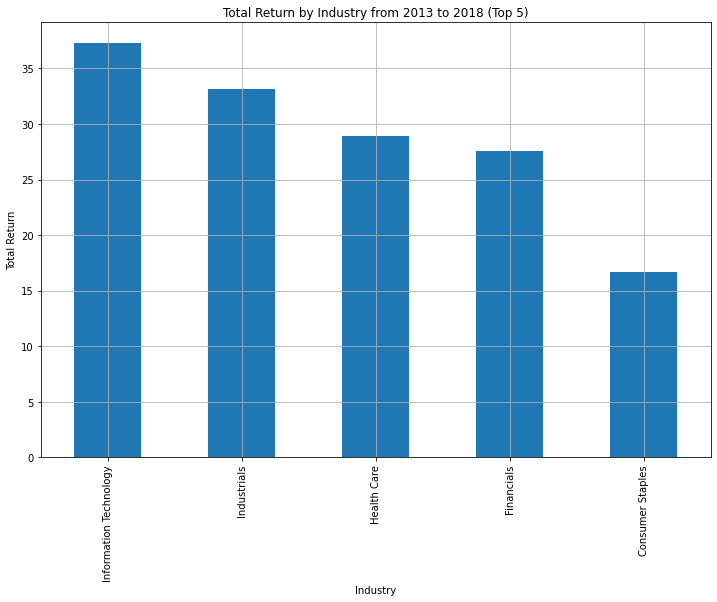

In [67]:
# extract top 5 industries by total return
topIndustries1 = industryReturns.head()

# plot bar graph
fig, ax = plt.subplots(figsize = (12, 8))
topIndustries1.plot.bar(ax = ax, grid = True)
ax.set_xlabel('Industry')
ax.set_ylabel('Total Return')
ax.set_title('Total Return by Industry from 2013 to 2018 (Top 5)')
plt.show()

* Graph of the top industries' total returns over time

I'm trying so show a zoomed out look of the time period so that you can easily match it to a time of your choice and you can see which sectors were most profitable.

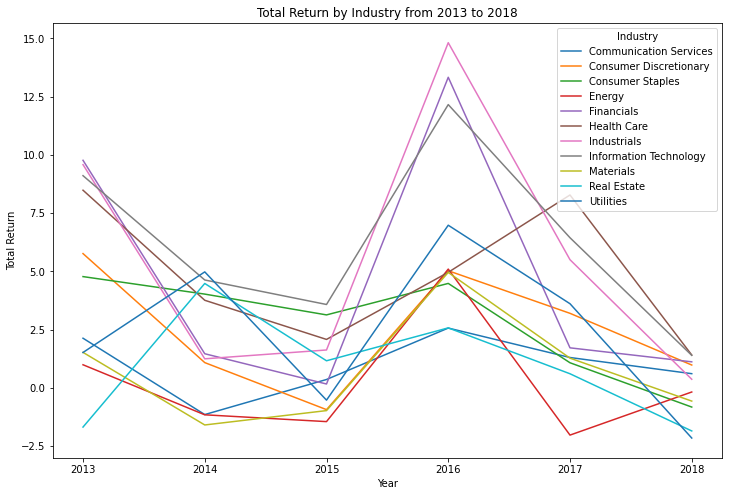

In [62]:
# group by year and industry to get total return for each year and industry
stockDataMPGrouped = stockDataMP.groupby([stockDataMP['Date'].dt.year, 'Industry'])['Total Return(IND)'].sum()

# plot results
fig, ax = plt.subplots(figsize = (12, 8))
stockDataMPGrouped.unstack().plot(ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('Total Return')
ax.set_title('Total Return by Industry from 2013 to 2018')
plt.show()

For this section I conclude that the shift to an online reality has caused massive growth for the tech and financial sectors, along with industrials. With distrust in having to put all your information online, new tech companies popping up, needing funding, then needing a building, and the fact people wanted to get rich off the crypto-boom, it makes sense that these three industries have grown the most. 

# Political Shifts

* Political shift: most profitable industries leading up to, and passed the inauguration, for the US election of 2016. What I'm attempting to highlight are the types of companies or industries that might accel in a period where there is a shift from anticipating democratic policies to anticipating republican policies in the US. 

I've output the top five earning companies from the top three earning industries in the time period from August 2016 - February 2017. The units are percent change of that stock over the specified time period.

In [68]:
# creating function to print the top 5 companies
def printTop5(df):
    return df.nlargest(5)

startDate = np.datetime64('2016-08-01' )
endDate = np.datetime64( '2017-02-28')
stockDataMP2 = stockData[(stockData['Date'] >= startDate) & (stockData['Date'] <= endDate)]

# calculate total return for each company and group by industry and name
stockDataMP2['Total Return'] = ( stockDataMP2['Close'] - stockDataMP2['Open']) / stockDataMP2['Open']
companyReturns = stockDataMP2.groupby(['Industry', 'Company Name'])['Total Return'].sum()

# get the top three industries by total return
topIndustries = companyReturns.groupby('Industry').sum().nlargest(3).index
topIndustries = industryReturns.head(3).index.tolist()
companyTop5 = companyReturns.groupby( level = 0, group_keys = False).apply(printTop5)
companyTop5 = companyTop5.loc[topIndustries]

print(companyTop5)

Industry                Company Name              
Information Technology  HP Inc.                       0.377194
                        Hewlett Packard Enterprise    0.372954
                        Autodesk                      0.334216
                        NetApp                        0.314961
                        Apple Inc.                    0.304571
Industrials             Southwest Airlines            0.426225
                        CSX                           0.408109
                        Robert Half                   0.378440
                        Alaska Air Group              0.362160
                        United Airlines Holdings      0.330338
Health Care             HCA Healthcare                0.270687
                        Idexx Laboratories            0.197655
                        Cigna                         0.174402
                        ResMed                        0.172967
                        Cardinal Health               0.150471
Name

C:\Users\willm\AppData\Local\Temp\ipykernel_10916\514166740.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockDataMP2['Total Return'] = ( stockDataMP2['Close'] - stockDataMP2['Open']) / stockDataMP2['Open']


* Political shift: In 2013, Barack Obama was inaugurated for his second term as President of the United States. In 2014, the United States imposed sanctions on Russia in response to its annexation of Crimea. This covers 2013-2014, the first two years of Obama's presidency, as well as the sanctions on Russia. What I'm attempting to show are the types of companies or industries that might accel in a period where there has been four years of democratic policies in the Us, prior, and anticipation of more, for four more years. 

I've output the top five earning companies from the top three earning industries in the time period from January 2013 - December 2014. 

In [69]:
# filter data between start and end dates
startDate = np.datetime64('2013-01-01' )
endDate = np.datetime64( '2014-12-31')
stockDataMP3 = stockData[(stockData['Date'] >= startDate) & (stockData['Date'] <= endDate)]

# calculate total return for each company and group by industry and name
stockDataMP3['Total Return'] = ( stockDataMP3['Close'] - stockDataMP3['Open']) / stockDataMP3['Open']
companyReturns = stockDataMP3.groupby(['Industry', 'Company Name'])['Total Return'].sum()

# get the top three industries by total return
topIndustries = companyReturns.groupby('Industry').sum().nlargest(3).index
topIndustries = industryReturns.head(3).index.tolist()
companyTop5 = companyReturns.groupby( level = 0, group_keys = False).apply(printTop5)
companyTop5 = companyTop5.loc[topIndustries]

print(companyTop5)

Industry                Company Name                 
Information Technology  Western Digital                  0.754969
                        Corning Inc.                     0.675726
                        Cisco                            0.556059
                        Gartner                          0.551732
                        Motorola Solutions               0.547794
Industrials             General Dynamics                 0.696813
                        Huntington Ingalls Industries    0.676390
                        Northrop Grumman                 0.537724
                        Lockheed Martin                  0.468614
                        Southwest Airlines               0.466626
Health Care             Incyte                           1.265822
                        Humana                           0.757918
                        AbbVie                           0.568249
                        Centene Corporation              0.547014
                      

C:\Users\willm\AppData\Local\Temp\ipykernel_10916\1946244952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockDataMP3['Total Return'] = ( stockDataMP3['Close'] - stockDataMP3['Open']) / stockDataMP3['Open']


* Graph for the first political shift


C:\Users\willm\AppData\Local\Temp\ipykernel_10916\3395764901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockDataMP3['Total Return'] = (stockDataMP3['Close'] - stockDataMP3['Open']) / stockDataMP3['Open']


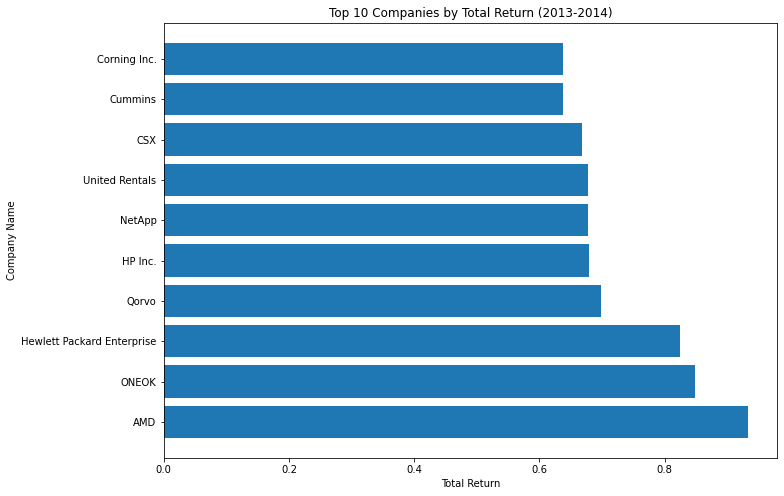

In [81]:
# filter data between start and end dates
startDate = np.datetime64('2016-01-01')
endDate = np.datetime64('2017-02-28')
stockDataMP3 = stockData[(stockData['Date'] >= startDate) & (stockData['Date'] <= endDate)]

# calculate total return for each company and group by industry and name
stockDataMP3['Total Return'] = (stockDataMP3['Close'] - stockDataMP3['Open']) / stockDataMP3['Open']
companyReturns = stockDataMP3.groupby(['Industry', 'Company Name'])['Total Return'].sum()

# get the top 10 companies by total return
companyTop10 = companyReturns.nlargest(10)

# create a horizontal bar plot
fig, ax = plt.subplots(figsize=(11, 8))
plt.barh(companyTop10.index.get_level_values(1), companyTop10.values)
plt.title('Top 10 Companies by Total Return (2016-2017)')
plt.xlabel('Total Return')
plt.ylabel('Company Name')
plt.show()

* Graph for the second political shift scenario 

C:\Users\willm\AppData\Local\Temp\ipykernel_10916\370561514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockDataMP3['Total Return'] = (stockDataMP3['Close'] - stockDataMP3['Open']) / stockDataMP3['Open']


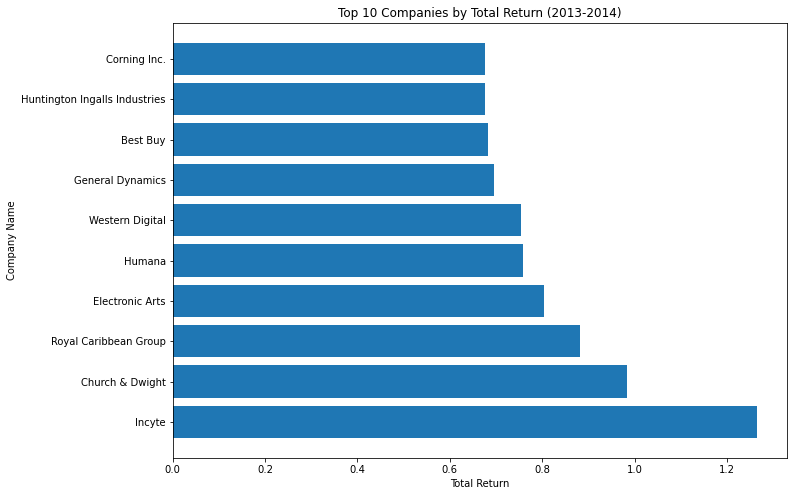

In [80]:
# filter data between start and end dates
startDate = np.datetime64('2013-01-01')
endDate = np.datetime64('2014-12-31')
stockDataMP3 = stockData[(stockData['Date'] >= startDate) & (stockData['Date'] <= endDate)]

# calculate total return for each company and group by industry and name
stockDataMP3['Total Return'] = (stockDataMP3['Close'] - stockDataMP3['Open']) / stockDataMP3['Open']
companyReturns = stockDataMP3.groupby(['Industry', 'Company Name'])['Total Return'].sum()

# get the top 10 companies by total return
companyTop10 = companyReturns.nlargest(10)

# create a horizontal bar plot
fig, ax = plt.subplots(figsize = (11, 8))
plt.barh(companyTop10.index.get_level_values(1), companyTop10.values)
plt.title('Top 10 Companies by Total Return (2013-2014)')
plt.xlabel('Total Return')
plt.ylabel('Company Name')
plt.show()

Between the two analysis above, we see changes in companies, but not the top industries. I was expecting to see a greater difference between the two political climates. Perhaps this is true for different periods in history, but for this period, it seems like Us political policies effect companies individually, and not which sectors as a whole are successful(more data would be needed for this). I conclude the world heads in a particular direction and the industries that are profitable, are such, because of global factors.